In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
data= pd.read_csv('/content/Toddler Autism dataset July 2018.csv')
print(data)

      Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  \
0           1   0   0   0   0   0   0   1   1   0    1        28   
1           2   1   1   0   0   0   1   1   0   0    0        36   
2           3   1   0   0   0   0   0   1   1   0    1        36   
3           4   1   1   1   1   1   1   1   1   1    1        24   
4           5   1   1   0   1   1   1   1   1   1    1        20   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...   
1049     1050   0   0   0   0   0   0   0   0   0    1        24   
1050     1051   0   0   1   1   1   0   1   0   1    0        12   
1051     1052   1   0   1   1   1   1   1   1   1    1        18   
1052     1053   1   0   0   0   0   0   0   1   0    1        19   
1053     1054   1   1   0   0   1   1   0   1   1    0        24   

      Qchat-10-Score Sex       Ethnicity Jaundice Family_mem_with_ASD  \
0                  3   f  middle eastern      yes                  no   
1                  4   m  White Europ

In [3]:
data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
data.tail()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No
1053,1054,1,1,0,0,1,1,0,1,1,0,24,6,m,asian,yes,yes,family member,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [6]:
data.shape

(1054, 19)

In [7]:
data.isnull().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [8]:
data.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [9]:
data["Class/ASD Traits "].value_counts()

Yes    728
No     326
Name: Class/ASD Traits , dtype: int64

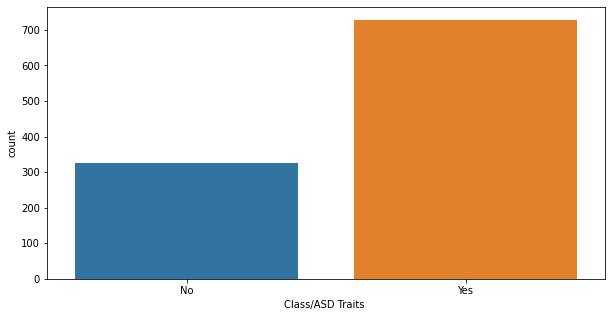

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x="Class/ASD Traits ",data=data)
plt.show()

In [11]:
encoder=LabelEncoder()

In [12]:
data['Sex']=encoder.fit_transform(data['Sex'])
data['Ethnicity']=encoder.fit_transform(data['Ethnicity'])
data['Jaundice']=encoder.fit_transform(data['Jaundice'])
data['Family_mem_with_ASD']=encoder.fit_transform(data['Family_mem_with_ASD'])
data['Who completed the test']=encoder.fit_transform(data['Who completed the test'])


In [13]:
x=data.drop(columns='Case_No',axis=1)
x=data.drop(columns='Class/ASD Traits ',axis=1)


In [14]:
y=data['Class/ASD Traits ']

In [15]:
print(x)

      Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  \
0           1   0   0   0   0   0   0   1   1   0    1        28   
1           2   1   1   0   0   0   1   1   0   0    0        36   
2           3   1   0   0   0   0   0   1   1   0    1        36   
3           4   1   1   1   1   1   1   1   1   1    1        24   
4           5   1   1   0   1   1   1   1   1   1    1        20   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...   
1049     1050   0   0   0   0   0   0   0   0   0    1        24   
1050     1051   0   0   1   1   1   0   1   0   1    0        12   
1051     1052   1   0   1   1   1   1   1   1   1    1        18   
1052     1053   1   0   0   0   0   0   0   1   0    1        19   
1053     1054   1   1   0   0   1   1   0   1   1    0        24   

      Qchat-10-Score  Sex  Ethnicity  Jaundice  Family_mem_with_ASD  \
0                  3    0          8         1                    0   
1                  4    1          5     

In [16]:
print(y)

0        No
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
1049     No
1050    Yes
1051    Yes
1052     No
1053    Yes
Name: Class/ASD Traits , Length: 1054, dtype: object


In [17]:
X_train, X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

**Applying KNN**

In [18]:
classifier=KNeighborsClassifier(n_neighbors=3)

In [19]:
classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
X_train_pred = classifier.predict(X_train)

In [21]:
knn_train_acc=accuracy_score(X_train_pred,Y_train)


In [22]:
print('Accuracy on test data : ', knn_train_acc)

Accuracy on test data :  0.8861209964412812


In [23]:
test_data_pred = classifier.predict(X_test)

In [24]:
knn_test_acc=accuracy_score(test_data_pred,Y_test)


In [25]:
print('Accuracy on test data : ', knn_test_acc)

Accuracy on test data :  0.7488151658767772


In [26]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, test_data_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, test_data_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, test_data_pred,average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.748815
Precision: 0.737906
Recall: 0.748815


***Applying logistic Regression***

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
reg=LogisticRegression()

In [29]:
reg.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [30]:
y_train_pred=reg.predict(X_train)

In [31]:
y_test_pred=reg.predict(X_test)

In [32]:
print("The training accuracy is",accuracy_score(Y_train, y_train_pred))

The training accuracy is 0.99644128113879


In [33]:
print("The test accuracy is",accuracy_score(Y_test, y_test_pred))

The test accuracy is 0.981042654028436


In [34]:
reg_test_acc=accuracy_score(Y_test, y_test_pred)
reg_train_acc=accuracy_score(Y_train, y_train_pred)

In [35]:
confusion_matrix(Y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)

array([[ 62,   3],
       [  1, 145]])

In [36]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_test_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_test_pred,average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.981043
Precision: 0.981084
Recall: 0.981043


***Applying SVM***

In [37]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train,Y_train)

SVC()

In [38]:
y_train_pred=svm.predict(X_train)
y_test_pred=svm.predict(X_test)

In [39]:
print("The training accuracy is",accuracy_score(Y_train, y_train_pred))
print("The test accuracy is",accuracy_score(Y_test, y_test_pred))

The training accuracy is 0.6903914590747331
The test accuracy is 0.6919431279620853


In [40]:
y_pred=svm.predict(x)
print("The accuracy is",accuracy_score(y, y_pred))

The accuracy is 0.6907020872865275


In [41]:
svm_test_acc=accuracy_score(Y_test, y_test_pred)
svm_train_acc=accuracy_score(Y_train, y_train_pred)

In [42]:
confusion_matrix(Y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)

array([[  0,  65],
       [  0, 146]])

In [43]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_test_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_test_pred,average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.691943
Precision: 0.478785
Recall: 0.691943


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Applying Random Forest***

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10) 
rf.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=10)

In [45]:
# performing predictions on the test dataset
y_test_pred = rf.predict(X_test)
# performing predictions on the train dataset
y_train_pred = rf.predict(X_train)


In [46]:
y_pred=rf.predict(x)

In [47]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE TEST MODEL: ", accuracy_score(Y_test, y_test_pred))


ACCURACY OF THE TEST MODEL:  1.0


In [48]:
print("ACCURACY OF THE TRAIN MODEL: ", accuracy_score(Y_train, y_train_pred))

ACCURACY OF THE TRAIN MODEL:  1.0


In [49]:
rf_test_acc=accuracy_score(Y_test, y_test_pred)
rf_train_acc=accuracy_score(Y_train, y_train_pred)

In [50]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ",accuracy_score(y, y_pred))

ACCURACY OF THE MODEL:  1.0


In [51]:
confusion_matrix(Y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)

array([[ 65,   0],
       [  0, 146]])

In [52]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_test_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_test_pred,average='weighted')
print('Recall: %f' % recall)

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000


***Applying NN***

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [54]:
nn = MLPClassifier(random_state=2, max_iter=100).fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [55]:
# performing predictions on the test dataset
y_test_pred = nn.predict(X_test)
# performing predictions on the train dataset
y_train_pred = nn.predict(X_train)

In [56]:
y_pred=nn.predict(x)

In [57]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE TRAIN MODEL: ", accuracy_score(Y_test, y_test_pred))

ACCURACY OF THE TRAIN MODEL:  0.966824644549763


In [58]:
print("ACCURACY OF THE TEST MODEL: ", accuracy_score(Y_train, y_train_pred))

ACCURACY OF THE TEST MODEL:  0.9727164887307236


In [59]:
nn_test_acc=accuracy_score(Y_test, y_test_pred)
nn_train_acc=accuracy_score(Y_train, y_train_pred)

In [60]:
confusion_matrix(Y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)

array([[ 58,   7],
       [  0, 146]])

In [61]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_test_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_test_pred,average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.966825
Precision: 0.968342
Recall: 0.966825


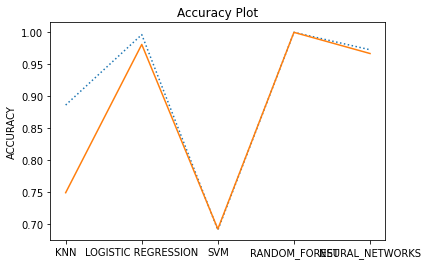

In [62]:
trainpoints =  np.array([knn_train_acc,reg_train_acc,svm_train_acc,rf_train_acc,nn_train_acc])
testpoints = np.array([knn_test_acc,reg_test_acc,svm_test_acc,rf_test_acc,nn_test_acc])
labels=np.array(["KNN","LOGISTIC REGRESSION","SVM","RANDOM_FOREST","NEURAL_NETWORKS"])
plt.plot(labels,trainpoints, linestyle = 'dotted')

plt.plot(labels,testpoints, linestyle = 'solid',label=labels)
plt.title("Accuracy Plot")
# plt.xlabel("ALGORITHM")
plt.ylabel("ACCURACY")
plt.show()